In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import shutil
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt


from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel, NBEATSModel
from darts.models.forecasting.xgboost import XGBModel
from darts.models.forecasting.rnn_model import RNNModel

from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, SunspotsDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mape, smape, mae
from darts.utils.utils import ModelMode

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

#### Config

In [41]:
country = "South Africa"
next_step = 5

In [42]:
df_aids = pd.read_csv("Cleaned HIV Data.csv")
series_aids = TimeSeries.from_dataframe(df_aids,
                                    time_col="Time"
                                    )

In [43]:
es_model = ExponentialSmoothing(trend=ModelMode.ADDITIVE, seasonal=None)
es_model.fit(series_aids[country])

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=None, seasonal_periods=None, random_state=0)

In [44]:
es_pred = es_model.predict(next_step)

<Axes: xlabel='Time'>

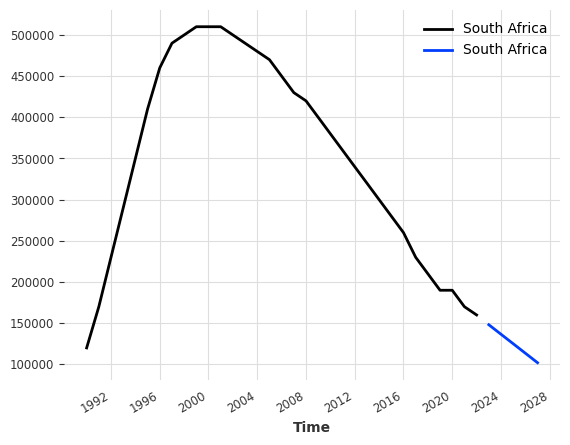

In [45]:
series_aids[country].plot()
es_pred.plot()

In [48]:
es_pred.pd_dataframe()

component,South Africa
Time,
2023-01-01,148135
2024-01-01,136602
2025-01-01,125069
2026-01-01,113535
2027-01-01,102002
